# Parte I-Regresión logistica

In [1]:
from Datos import Datos
import EstrategiaParticionado
from matplotlib import pyplot as plt
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
import Clasificador
from tabulate import tabulate
import numpy as np

In [2]:
# Cargamos datasets
PARTICIONES=5
dataset_1=Datos('./datasets/heart.csv')
dataset_1.normalizarDatos()
dataset_2=Datos('./datasets/wdbc.csv')
dataset_2.normalizarDatos()

# Cargamos estrategia de particionado
estrategia_1 = EstrategiaParticionado.ValidacionSimple(PARTICIONES, 0.2)
estrategia_2 = EstrategiaParticionado.ValidacionSimple(PARTICIONES, 0.2)

# Cargamos Clasificadores
clasificador = Clasificador.Clasificador()
logisticReg = ClasificadorRegresionLogistica()
logisticRegSK = Clasificador.ClasificadorRegresionLogisticaSKLearn()
naiveBayes = ClasificadorNaiveBayes()
knn = ClasificadorKNN()
clasificadores = [logisticReg,naiveBayes,knn]
nombres = ["Regresion Logistica", "Naive Bayes", "KNN"]

## HEART

In [3]:
errores = clasificador.validacion(estrategia_1, dataset_1, logisticReg, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)


Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |       0.228261 |
+----------------+----------------+
|              2 |       0.315217 |
+----------------+----------------+
|              3 |       0.298913 |
+----------------+----------------+
|              4 |       0.445652 |
+----------------+----------------+
|              5 |       0.277174 |
+----------------+----------------+


In [4]:
errores = clasificador.validacion(estrategia_1, dataset_1, logisticRegSK, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |       0.152174 |
+----------------+----------------+
|              2 |       0.108696 |
+----------------+----------------+
|              3 |       0.146739 |
+----------------+----------------+
|              4 |       0.11413  |
+----------------+----------------+
|              5 |       0.157609 |
+----------------+----------------+


## WDBC

In [5]:
errores = clasificador.validacion(estrategia_2, dataset_2, logisticReg, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |     0.0263158  |
+----------------+----------------+
|              2 |     0.00877193 |
+----------------+----------------+
|              3 |     0.0175439  |
+----------------+----------------+
|              4 |     0.0263158  |
+----------------+----------------+
|              5 |     0          |
+----------------+----------------+


In [6]:
errores = clasificador.validacion(estrategia_2, dataset_2, logisticRegSK, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |     0.00877193 |
+----------------+----------------+
|              2 |     0.0175439  |
+----------------+----------------+
|              3 |     0.00877193 |
+----------------+----------------+
|              4 |     0.0175439  |
+----------------+----------------+
|              5 |     0          |
+----------------+----------------+


# PARTE II - Analisis ROC

[[209, 421, 105, 185], [347, 470, 56, 47], [332, 449, 77, 62]]
[[0.46954314720812185, 0.8003802281368821], [0.11928934010152284, 0.8935361216730038], [0.15736040609137056, 0.8536121673003803]]


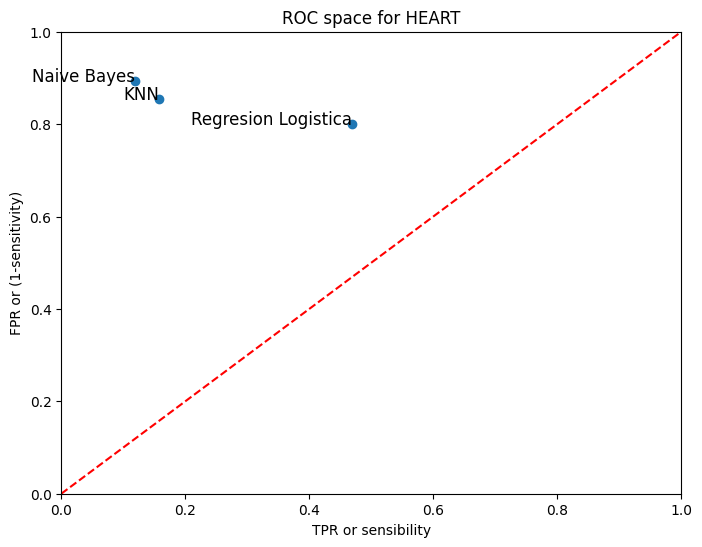

In [7]:
def dibujar_analisis_ROC(dataset, estrategia, dataset_name):
    # TN, TP, FN, FP
    res = clasificador.analisis_ROC(estrategia, dataset, clasificadores, None)
    print(res)

    analisis = []
    for i in range(len(clasificadores)):
        tpr = res[i][1] / (res[i][1] + res[i][2])
        fpr = res[i][3] / (res[i][3] + res[i][0])
        analisis.append([fpr, tpr])
    print(analisis)

    # Gráfica Analisis ROC
    x, y = zip(*analisis)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)

    for i, punto in enumerate(analisis):
        plt.text(punto[0], punto[1], f"{nombres[i]}", fontsize=12, ha='right')

    x_tendencia = np.linspace(0, 1, 100)
    y_tendencia = x_tendencia

    plt.plot(x_tendencia, y_tendencia, 'r--')

    plt.xlabel('TPR or sensibility')
    plt.ylabel('FPR or (1-sensitivity)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.title(f'ROC space for {dataset_name}')

    plt.show()

dibujar_analisis_ROC(dataset_1, estrategia_1, "HEART")

[[337, 223, 5, 5], [318, 207, 21, 24], [338, 209, 19, 4]]
[[0.014619883040935672, 0.9780701754385965], [0.07017543859649122, 0.9078947368421053], [0.011695906432748537, 0.9166666666666666]]


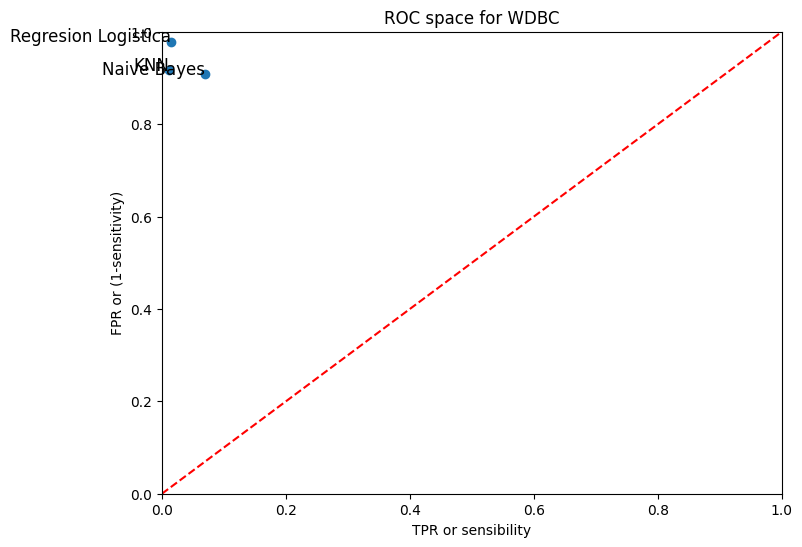

In [8]:
dibujar_analisis_ROC(dataset_2, estrategia_2, "WDBC")

# PARTE III - Curva ROC

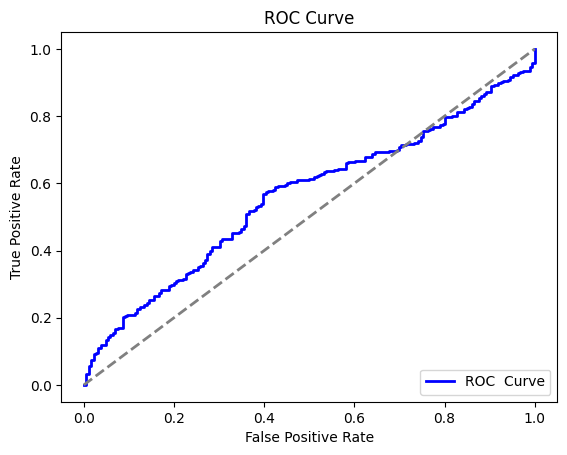

In [9]:
tpr, fpr = clasificador.curva_ROC(estrategia_1, dataset_1, logisticReg, None)

tpr = [x/sum(tpr) for x in tpr]
fpr = [x/sum(fpr) for x in fpr]

for i in range(len(tpr)-1):
    tpr[i+1] += tpr[i]
    fpr[i+1] += fpr[i]

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC  Curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()
